In [1]:
# Import libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
# Read data into Python

perf_df = pd.read_csv('../datos/datos_desempenio.csv')
job_df = pd.read_csv('../datos/datos_laborales.csv')
personal_df = pd.read_csv('../datos/datos_personales.csv')

In [3]:
# Combine all data into one dataframe

df = job_df.merge(personal_df)
df = df.merge(perf_df)
df

,EmpID,EmpStatusID,DeptID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,DateofHire,DateofTermination,...,HispanicLatino,RaceDesc,PerfScoreID,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,1,5,0,62506,0,19,Production Technician I,7/5/2011,NaN,...,No,White,4,Exceeds,4.60,5,0,1/17/2019,0,1
1,10084,5,3,0,104437,1,27,Sr. DBA,3/30/2015,6/16/2016,...,No,White,3,Fully Meets,4.96,3,6,2/24/2016,0,17
2,10196,5,5,0,64955,1,20,Production Technician II,7/5/2011,9/24/2012,...,No,White,3,Fully Meets,3.02,3,0,5/15/2012,0,3
3,10088,1,5,0,64991,0,19,Production Technician I,1/7/2008,NaN,...,No,White,3,Fully Meets,4.84,5,0,1/3/2019,0,15
4,10069,5,5,0,50825,1,19,Production Technician I,7/11/2011,9/6/2016,...,No,White,3,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,1,5,0,65893,0,20,Production Technician II,7/7/2014,NaN,...,No,White,3,Fully Meets,4.07,4,0,2/28/2019,0,13
307,10301,5,5,0,48513,1,19,Production Technician I,9/2/2008,9/29/2015,...,No,Asian,1,PIP,3.20,2,0,9/2/2015,5,4
308,10010,1,3,0,220450,0,6,CIO,4/10/2010,NaN,...,No,White,4,Exceeds,4.60,5,6,2/21/2019,0,16
309,10043,1,3,0,89292,0,9,Data Analyst,3/30/2015,NaN,...,No,White,3,Fully Meets,5.00,3,5,2/1/2019,0,11


In [4]:
# Remove unnecessary features

df = df.drop(['EmpStatusID', 'DeptID', 'PositionID', 'ManagerID', 'MaritalStatusID', 'GenderID', 'DOB', 'PerformanceScore'], axis=1)

In [5]:
# Convert date features to datetime format

df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofHire'] = df['DateofHire'].apply(lambda x: x.strftime('%d-%m-%Y'))
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
df['LastPerformanceReview_Date'] = df['LastPerformanceReview_Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])

In [6]:
# Remove empty spaces from 'Sex' feature

df['Sex'] = df['Sex'].apply(lambda x: x.strip())

In [7]:
# Create DataFrames to work with

normal_df = df.sort_values(by='DateofHire').copy()
timeseries_df = normal_df.set_index('DateofHire').copy()

In [8]:
# Creo la función para sacar el HC dinámico de empleados.

def dynamic_hc(dataset, dates_list):
    
    date_list = []
    daily_hc = []
    male_count = []
    female_count = []
    
    for chosendate in dates_list:
        date_list.append(chosendate)
        daily_hc.append(len(dataset[(dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull()))]))
        male_count.append(len(dataset[ (dataset['Sex'] == 'M') & ((dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull())))]))
        female_count.append(len(dataset[ (dataset['Sex'] == 'F') & ((dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull())))]))
        
    new_df = pd.DataFrame({'Date': date_list, 'F': female_count, 'M': male_count,'HC': daily_hc})
    new_df['% of Females'] = round((new_df['F'] / new_df['HC'])*100, 2)
    new_df['% of Males'] = round((new_df['M'] / new_df['HC'])*100, 2)
        
    return new_df

In [9]:
# Compruebo el HC para confirmar que la función trabaja correctamente.

date_list = pd.date_range('2006-09-01', '2018-11-10')

new_df = dynamic_hc(df, date_list)
new_df

,Date,F,M,HC,% of Females,% of Males
0,2006-09-01,0,1,1,0.00,100.00
1,2006-09-02,0,1,1,0.00,100.00
2,2006-09-03,0,1,1,0.00,100.00
3,2006-09-04,0,1,1,0.00,100.00
4,2006-09-05,0,1,1,0.00,100.00
...,...,...,...,...,...,...
4449,2018-11-06,117,91,208,56.25,43.75
4450,2018-11-07,117,91,208,56.25,43.75
4451,2018-11-08,117,91,208,56.25,43.75
4452,2018-11-09,117,91,208,56.25,43.75


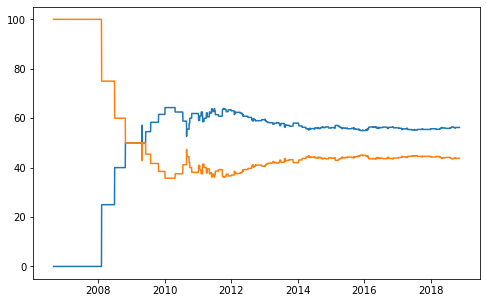

In [10]:
date_df = new_df.set_index('Date')
date_df

plt.subplots(figsize=(8, 5))
plt.plot(date_df['% of Females'])
plt.plot(date_df['% of Males']);

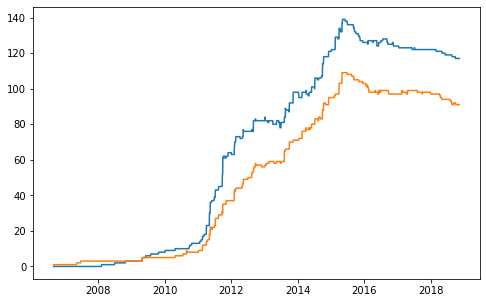

In [11]:
plt.subplots(figsize=(8,5))
plt.plot(date_df['F'])
plt.plot(date_df['M']);

In [41]:
def mean_sal_gender(dataset, dates_list):
    
    date_list = []
    salary_m = []
    salary_f = []
    
    for chosendate in dates_list:
        date_list.append(chosendate)
        salary_f.append(round(dataset[(dataset['Sex']=='F') & (dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull()))]['Salary'].mean(), 2))
        salary_m.append(round(dataset[(dataset['Sex']=='M') & (dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull()))]['Salary'].mean(), 2))
        
    new_df = pd.DataFrame({'Date': date_list, 'F_sal': salary_f, 'M_sal': salary_m})
        
    return new_df

In [42]:
mean_sal = mean_sal_gender(df, date_list)
mean_sal = mean_sal.set_index('Date')

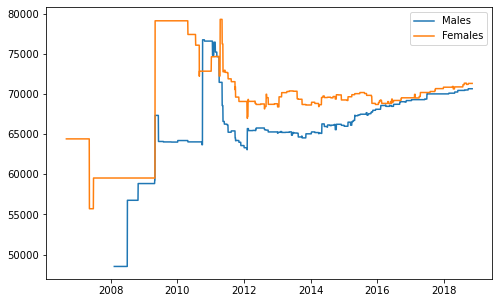

In [44]:
plt.subplots(figsize=(8, 5))
plt.plot(mean_sal['F_sal'], label='Males')
plt.plot(mean_sal['M_sal'], label='Females')

plt.legend();

In [46]:
def fem_male_ratio(dataset, dates_list):
    
    date_list = []
    ratio = []
    salary_ratio = []
    
    for chosendate in dates_list:
        date_list.append(chosendate)
        ratio.append(len(dataset[ (dataset['Sex'] == 'F') & ((dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull())))]) /
        len(dataset[ (dataset['Sex'] == 'M') & ((dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull())))]))
        salary_ratio.append(dataset[(dataset['Sex']=='F') & (dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull()))]['Salary'].mean() /
                           dataset[(dataset['Sex']=='M') & (dataset['DateofHire']<=chosendate) & ((dataset['DateofTermination']>=chosendate) | (dataset['DateofTermination'].isnull()))]['Salary'].mean())
        
        new_df = pd.DataFrame({'Date': date_list, 'F2M Ratio': ratio, 'F2M Salary Ratio': salary_ratio})
        
    return new_df

In [47]:
ratio_df = fem_male_ratio(df, date_list)
ratio_df = ratio_df.set_index('Date')
ratio_df

,F2M Ratio,F2M Salary Ratio
Date,,
2006-09-01,0.000000,NaN
2006-09-02,0.000000,NaN
2006-09-03,0.000000,NaN
2006-09-04,0.000000,NaN
2006-09-05,0.000000,NaN
...,...,...
2018-11-06,1.285714,0.990704
2018-11-07,1.285714,0.990704
2018-11-08,1.285714,0.990704


In [50]:
diversity_df = date_df.join(mean_sal)
diversity_df = diversity_df.join(ratio_df)
diversity_df = diversity_df.fillna(0)

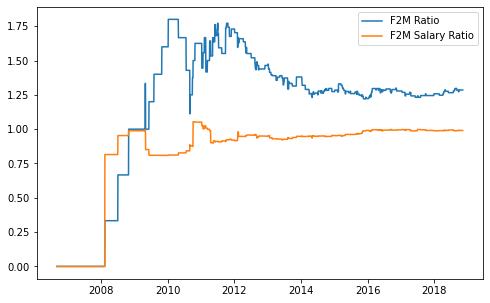

In [58]:
plt.subplots(figsize=(8, 5))

plt.plot(diversity_df['F2M Ratio'], label='F2M Ratio')
plt.plot(diversity_df['F2M Salary Ratio'], label='F2M Salary Ratio')

plt.legend();

In [61]:
df

,EmpID,FromDiversityJobFairID,Salary,Termd,Position,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,...,CitizenDesc,HispanicLatino,RaceDesc,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,0,62506,0,Production Technician I,2011-05-07,NaT,N/A-StillEmployed,Active,Production,...,US Citizen,No,White,4,4.60,5,0,2019-01-17,0,1
1,10084,0,104437,1,Sr. DBA,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,...,US Citizen,No,White,3,4.96,3,6,2016-02-24,0,17
2,10196,0,64955,1,Production Technician II,2011-05-07,2012-09-24,hours,Voluntarily Terminated,Production,...,US Citizen,No,White,3,3.02,3,0,2012-05-15,0,3
3,10088,0,64991,0,Production Technician I,2008-07-01,NaT,N/A-StillEmployed,Active,Production,...,US Citizen,No,White,3,4.84,5,0,2019-03-01,0,15
4,10069,0,50825,1,Production Technician I,2011-11-07,2016-09-06,return to school,Voluntarily Terminated,Production,...,US Citizen,No,White,3,5.00,4,0,2016-01-02,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,65893,0,Production Technician II,2014-07-07,NaT,N/A-StillEmployed,Active,Production,...,US Citizen,No,White,3,4.07,4,0,2019-02-28,0,13
307,10301,0,48513,1,Production Technician I,2008-02-09,2015-09-29,Another position,Voluntarily Terminated,Production,...,US Citizen,No,Asian,1,3.20,2,0,2015-02-09,5,4
308,10010,0,220450,0,CIO,2010-10-04,NaT,N/A-StillEmployed,Active,IT/IS,...,US Citizen,No,White,4,4.60,5,6,2019-02-21,0,16
309,10043,0,89292,0,Data Analyst,2015-03-30,NaT,N/A-StillEmployed,Active,IT/IS,...,US Citizen,No,White,3,5.00,3,5,2019-01-02,0,11
